In [220]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
DATA_DIR = '../data/'

In [138]:
flu = pd.read_csv(DATA_DIR + 'googleflu.csv')
flu.describe()

,Influenza Data,influenza type a,symptoms of flu,flu duration,flu contagious,flu fever,treat the flu,how to treat the flu,signs of the flu,over the counter flu,...,flu contagious period,influenza incubation period,cold versus flu,flu in children,what to do if you have the flu,medicine for the flu,flu and fever,flu lasts,incubation period for the flu,do i have the flu
count,2.360000e+02,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,1.505387e-17,0.000031,0.000014,-0.000063,0.000024,-0.000039,-0.000050,0.000014,0.000014,-0.000096,...,0.000120,0.000113,0.000089,0.000033,-0.000307,0.000168,-0.000128,0.000080,0.000235,-0.000140
std,1.000026e+00,0.999983,1.000003,1.000031,0.999979,1.000029,1.000009,0.999962,0.999999,1.000060,...,0.999928,0.999947,0.999958,1.000002,1.000126,0.999881,1.000078,0.999896,0.999907,1.000104
min,-1.252000e+00,-0.648000,-0.772000,-0.768000,-0.709000,-0.800000,-0.735000,-0.715000,-0.543000,-0.684000,...,-0.506000,-0.580000,-0.898000,-0.535000,-0.476000,-0.667000,-0.775000,-0.743000,-0.439000,-0.654000
25%,-7.110000e-01,-0.607500,-0.541000,-0.583750,-0.516500,-0.532750,-0.548500,-0.570500,-0.428000,-0.684000,...,-0.506000,-0.580000,-0.898000,-0.427500,-0.476000,-0.667000,-0.775000,-0.743000,-0.439000,-0.654000
50%,-2.675000e-01,-0.430000,-0.234000,-0.310500,-0.317500,-0.313000,-0.293000,-0.295000,-0.278000,-0.283500,...,-0.304500,-0.340500,-0.211000,-0.256000,-0.476000,-0.265500,-0.237500,-0.301000,-0.328500,-0.279500
75%,3.377500e-01,0.203500,0.097000,0.230250,0.093750,0.166750,0.132500,0.145250,0.059750,0.116000,...,0.036500,0.100000,0.379500,0.075000,0.100500,0.258250,0.303500,0.332500,0.015250,0.187500
max,4.341000e+00,6.214000,8.735000,7.057000,9.195000,7.494000,8.385000,8.389000,11.376000,7.416000,...,8.562000,7.923000,5.715000,9.647000,10.492000,7.379000,4.846000,5.724000,9.674000,8.217000


In [139]:
flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Columns: 102 entries, Date to do i have the flu
dtypes: float64(101), object(1)
memory usage: 469.9+ KB


In [140]:
flu.head()

,Date,Influenza Data,influenza type a,symptoms of flu,flu duration,flu contagious,flu fever,treat the flu,how to treat the flu,signs of the flu,...,flu contagious period,influenza incubation period,cold versus flu,flu in children,what to do if you have the flu,medicine for the flu,flu and fever,flu lasts,incubation period for the flu,do i have the flu
0,1/4/04,0.599,1.570,0.106,1.490,0.168,2.240,0.118,0.346,0.091,...,0.589,2.292,2.818,0.166,-0.476,-0.667,-0.775,-0.743,-0.439,-0.654
1,1/11/04,-0.024,0.255,-0.013,0.422,-0.212,0.261,-0.300,-0.715,-0.181,...,-0.506,-0.580,-0.898,-0.218,-0.476,-0.667,-0.775,-0.743,-0.439,-0.654
2,1/18/04,-0.192,-0.111,-0.213,-0.017,-0.278,0.487,-0.735,-0.715,-0.543,...,-0.506,-0.580,-0.898,-0.535,-0.476,-0.667,-0.775,-0.743,-0.439,-0.654
3,1/25/04,-0.268,-0.648,-0.333,-0.768,-0.440,0.450,-0.233,-0.715,-0.543,...,-0.506,-0.580,-0.898,0.015,-0.476,-0.667,-0.775,-0.743,-0.439,-0.654
4,2/1/04,-0.522,-0.192,-0.509,-0.112,-0.537,-0.800,-0.735,-0.715,-0.543,...,-0.506,0.897,-0.898,-0.535,-0.476,-0.667,-0.775,-0.743,-0.439,-0.654


In [141]:
flu['Date'] = pd.to_datetime(flu['Date'])

In [142]:
flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Columns: 102 entries, Date to do i have the flu
dtypes: datetime64[ns](1), float64(101)
memory usage: 469.9 KB


In [143]:
mpl.rc("figure", figsize=(15, 8))

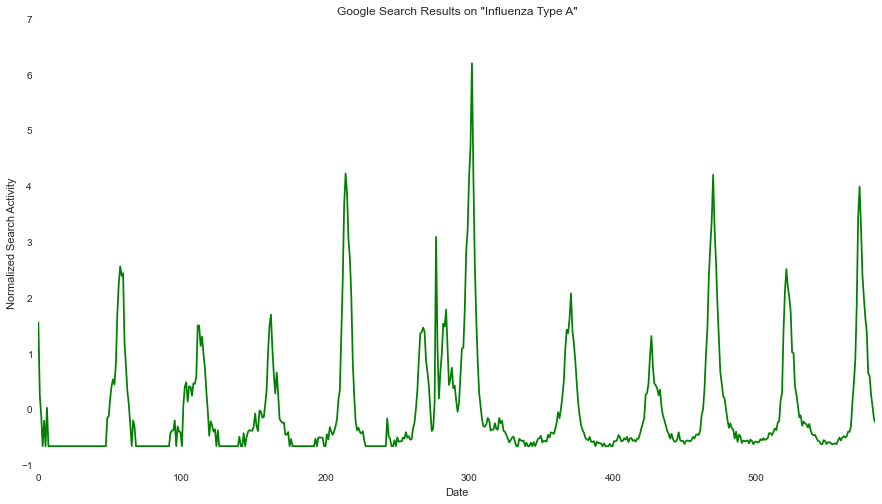

In [145]:
sns.tsplot(flu['influenza type a'], color='green')
plt.title('Google Search Results on "Influenza Type A"')
plt.xlabel('Date')
plt.ylabel('Normalized Search Activity')

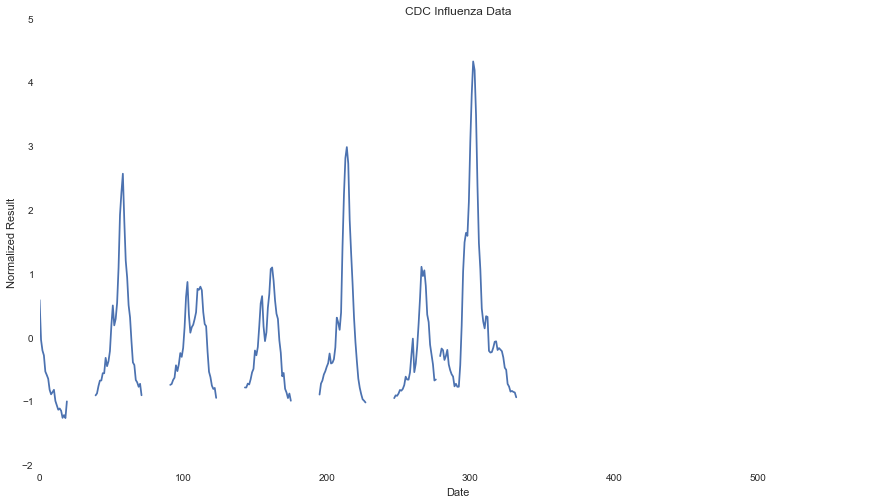

In [146]:
sns.tsplot(flu['Influenza Data'])
plt.title('CDC Influenza Data')
plt.xlabel('Date')
plt.ylabel('Normalized Result')

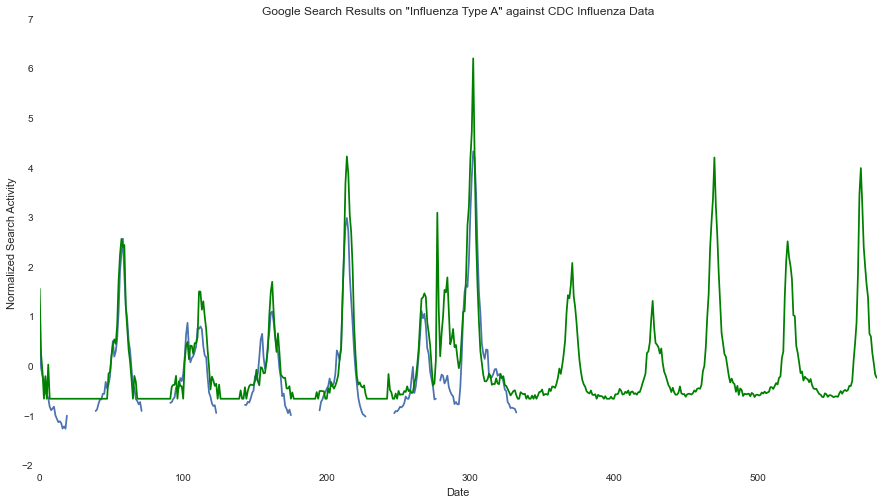

In [147]:
sns.tsplot(flu['Influenza Data'])
sns.tsplot(flu['influenza type a'], color='green')
plt.title('Google Search Results on "Influenza Type A" against CDC Influenza Data')
plt.xlabel('Date')
plt.ylabel('Normalized Search Activity')

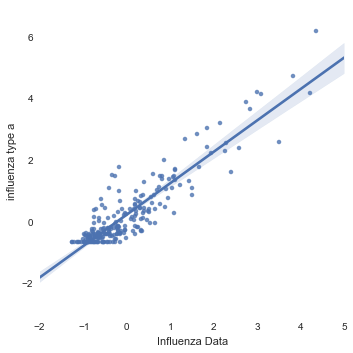

In [148]:
sns.lmplot("Influenza Data", "influenza type a", flu)

In [149]:
from statsmodels.formula.api import ols

flu_search = [[x] for x in flu['influenza type a'].values]
flu_data = flu['Influenza Data'].values

results = ols('flu_search ~ flu_data', flu).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             flu_search   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1084.
Date:                Fri, 10 Jul 2015   Prob (F-statistic):           8.29e-90
Time:                        17:13:42   Log-Likelihood:                -157.89
No. Observations:                 236   AIC:                             319.8
Df Residuals:                     234   BIC:                             326.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2474      0.031      8.012      0.0

In [231]:
fluCDC = flu[np.isfinite(flu['Influenza Data'])]

In [232]:
fluregr = linear_model.LinearRegression()
flu_search2 = [[x] for x in fluCDC['influenza type a'].values]
flu_data = fluCDC['Influenza Data'].values

In [234]:
fluregr.fit(flu_search2, flu_data)
print fluregr.score(flu_search2, flu_data)

0.822488610832


In [313]:
#for col in [len(fluCDC.ix[:,'influenza type a':])] 


scoreList = []
scoreDict = {}

for col in fluCDC.ix[:,'influenza type a':]:
#     from statsmodels.formula.api import ols

    fluregr = linear_model.LinearRegression()
    flu_search2 = [[x] for x in fluCDC[col].values]
    flu_data = fluCDC['Influenza Data'].values
    fluregr.fit(flu_search2, flu_data)
    scoreList.append(fluregr.score(flu_search2, flu_data))
    scoreDict[col] = fluregr.score(flu_search2, flu_data)
    
print scoreList
print scoreDict
print max(scoreList)
print scoreDict.values()
print scoreList.index(max(scoreList))





#print len(fluCDC.ix[:,'influenza type a':])

[0.8224886108324253, 0.81677793645151431, 0.81594821750825053, 0.79549877137063518, 0.7834979631426221, 0.7797845343737182, 0.77967051973050217, 0.77701784794061413, 0.77395641329602949, 0.76996076044277895, 0.76402975291821085, 0.75992695151867973, 0.7593043988301702, 0.75887460490567704, 0.75468749996870388, 0.74626424662245294, 0.73991013491757096, 0.73541203833091817, 0.73471498942694136, 0.71979580877542026, 0.71917107439700501, 0.71767546783768355, 0.71478069500525188, 0.71221301816039662, 0.71167808279798805, 0.70639851555263178, 0.70346399510454372, 0.70342332154592802, 0.70093666526285259, 0.69954493986107547, 0.69838374057438457, 0.69283035907632518, 0.68929663438458189, 0.68789206897820887, 0.68736139741789082, 0.68733153328924868, 0.68678870996867181, 0.68431875367854778, 0.68202078582708758, 0.6810205798266451, 0.68046575951969857, 0.67417228849307298, 0.67212295463253868, 0.6717892843167218, 0.66847330264462945, 0.66704289251759796, 0.66421316430380861, 0.6632137745938240

In [ ]:
# sns.heatmap(fluCDC)
fluCDCNew = fluCDC.iloc[:,2:]
sns.pairplot(fluCDCNew.corr())

In [166]:
import numpy as np
from scipy.optimize import curve_fit

def func(x,p1,p2):
  return p1*np.cos(p2*x) + p2*np.sin(p1*x)

In [201]:
popt, pcov = curve_fit(func, flu.index.values, flu['influenza type a'],p0=(1.6,.2))
popt

array([ 1.59222587,  0.20603474])

In [202]:
p1 = popt[0]
p2 = popt[1]
residuals = flu['influenza type a'] - func(flu.index.values,p1,p2)
fres = sum(residuals**2)
fres

1126.3690724416817

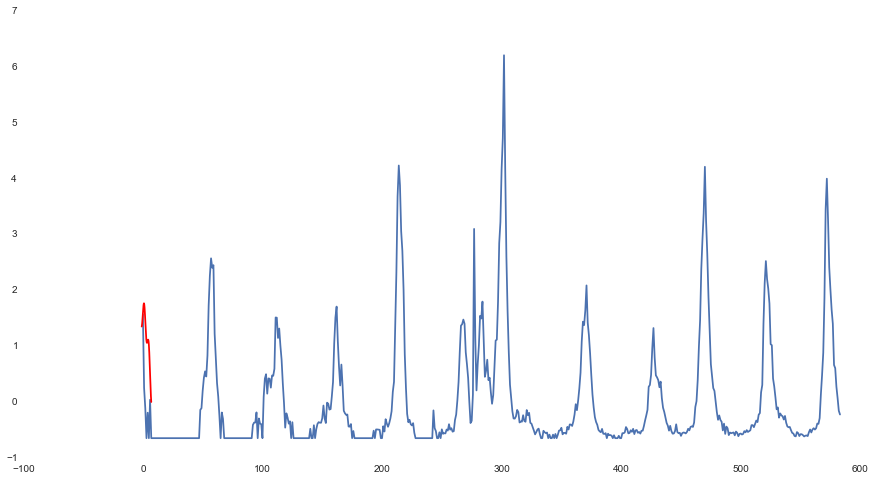

In [203]:
curvex=np.linspace(-1,7,300)
curvey=func(curvex,p1,p2)
plt.plot(flu.index.values, flu['influenza type a'])
plt.plot(curvex,curvey,'r')